# Proyek Analisis Data: Brazilian E-Commerce Public Dataset by Olist (E-Commerce Public Dataset)
- Nama: Muhammad Syarif Hidayat
- Email: mshidayat66@gmail.com
- Id Dicoding: mshidayat66

## Menentukan Pertanyaan Bisnis

- Produk apa yang paling laris terjual?
- Negara Bagian (State) mana yang paling sering membeli produk?
- Kapan waktu terakhir kali pelanggan melakukan transaksi?
- Berapa frekuensi pembelian yang dilakukan oleh seorang pelanggan dalam rentang beberapa bulan terakhir?
- Berapa besar pengeluaran yang dilakukan oleh pelanggan dalam rentang beberapa bulan terakhir?

## Menyiapkan semua library yang dibutuhkan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data Wrangling

### Gathering Data

In [2]:
#Load Tabel Customer
cust = pd.read_csv("customers_dataset.csv")
cust.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
#Load Tabel Order
order = pd.read_csv("orders_dataset.csv")
order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [4]:
#Load Tabel Order Item
order_items = pd.read_csv("order_items_dataset.csv")
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
#Load Tabel Product
prod = pd.read_csv("products_dataset.csv")
prod.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


### Assessing Data

In [6]:
#Menilai Data Customer
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [7]:
cats = ["customer_id", "customer_unique_id", "customer_city", "customer_state"]
nums = ["customer_zip_code_prefix"]

In [8]:
print("Jumlah duplikasi: ", cust.duplicated().sum())

Jumlah duplikasi:  0


In [9]:
cust.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


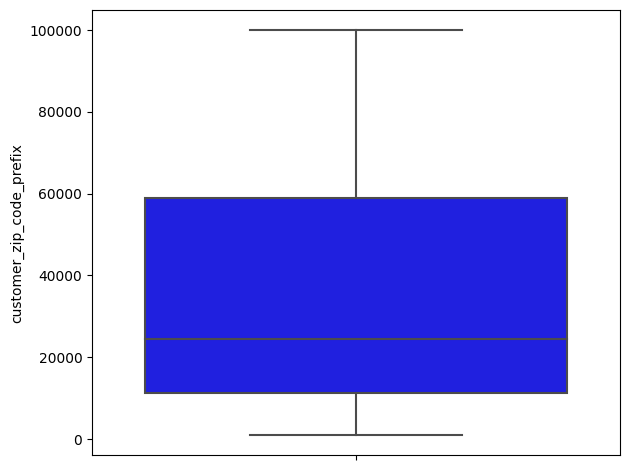

In [10]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=cust[nums[i]], color='blue', orient='v')
    plt.tight_layout()

In [11]:
#Menilai Data Order
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [12]:
order.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [13]:
print("Jumlah duplikasi: ", order.duplicated().sum())

Jumlah duplikasi:  0


In [14]:
order.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [15]:
#Menilai Data Order Items
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [16]:
cats = ["order_id ", "product_id", "seller_id", "shipping_limit_date"]
nums = ["order_item_id", "price", "freight_value"]

In [17]:
print("Jumlah duplikasi: ", order_items.duplicated().sum())

Jumlah duplikasi:  0


In [18]:
order_items.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


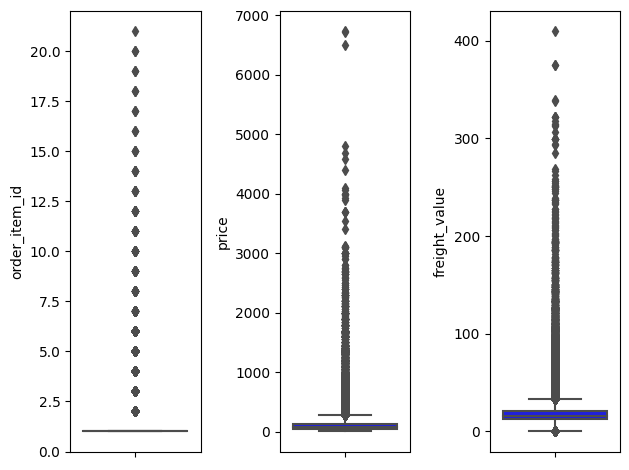

In [19]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=order_items[nums[i]], color='blue', orient='v')
    plt.tight_layout()

In [20]:
#Menilai Data Product
prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [21]:
cats = ["product_id ", "product_category_name"]
nums = ["product_name_lenght", "product_description_lenght", "product_photos_qty", "product_weight_g", "product_length_cm", "product_height_cm", "product_width_cm"]

In [22]:
prod.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [23]:
print("Jumlah duplikasi: ", prod.duplicated().sum())

Jumlah duplikasi:  0


In [24]:
prod.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


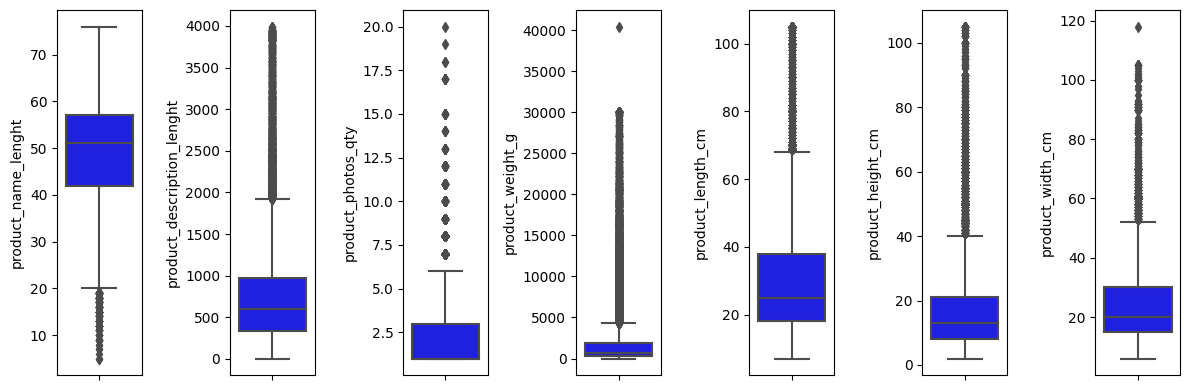

In [25]:
plt.figure(figsize=(12, 4))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=prod[nums[i]], color='blue', orient='v')
    plt.tight_layout()

1. `customers_dataset` : dataframe memiliki total 99441 baris dan 5 kolom, kolom `customer_zip_code_prefix` tidak simetrik atau `right skewed` karena mean > median
2. `orders_dataset` : dataframe memiliki total 99441 baris dan 8 kolom, terdapat missing value pada kolom `order_approved_at`, `order_delivered_carrier_date`dan `order_delivered_customer_date`, terdapat kesalahan tipe data pada kolom `order_purchase_timestamp`, `order_approved_at`, `order_delivered_carrier_date`, `order_delivered_customer_date`, `order_estimated_delivery_date`
3. `order_items_dataset` : dataframe memiliki total 112650 baris dan 7 kolom, terdapat kesalah tipe data pada kolom `shipping_limit_date`, kolom `price` dan `freight_value` tidak simetrik atau `right skewed` karena mean > median, Outlier terlihat utamanya pada kolom `price`, `freight_value`
4. `products_dataset` : dataframe memiliki total 32951 baris dan 8 kolom, terdapat missing value pada kolom `product_category_name`, `product_name_lenght`, `product_description_lenght`, `product_photos_qty`, `product_weight_g`, `product_length_cm`,`product_height_cm`, `product_width_cm`, kolom `product_description_lenght`, `product_weight_g`, `product_length_cm`, `product_height_cm` dan `product_width_cm` tidak simetrik atau `right skewed` karena mean > median, Outlier terlihat utamanya pada kolom kolom `product_description_lenght`, `product_weight_g`, `product_length_cm`, `product_height_cm` dan `product_width_cm`

### Cleaning Data

In [26]:
#Membersihkan Data Costumer
cust.drop("customer_zip_code_prefix", axis=1, inplace=True)

In [27]:
#Membersihkan Data Order
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in datetime_columns:
  order[column] = pd.to_datetime(order[column])

In [28]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [29]:
#Membersihkan Data Order Item
datetime_columns = ["shipping_limit_date"]

for column in datetime_columns:
  order_items[column] = pd.to_datetime(order_items[column])

In [30]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [31]:
#Membersihkan Data Product
prod.dropna(inplace=True)

In [32]:
prod.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

In [33]:
prod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32340 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32340 non-null  object 
 1   product_category_name       32340 non-null  object 
 2   product_name_lenght         32340 non-null  float64
 3   product_description_lenght  32340 non-null  float64
 4   product_photos_qty          32340 non-null  float64
 5   product_weight_g            32340 non-null  float64
 6   product_length_cm           32340 non-null  float64
 7   product_height_cm           32340 non-null  float64
 8   product_width_cm            32340 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


1. `customers_dataset` : Menghapus kolom `customer_zip_code_prefix` karena tidak digunakan
2. `orders_dataset` : Mengubah tipe data kolom `order_purchase_timestamp`, `order_approved_at`, `order_delivered_carrier_date`, `order_delivered_customer_date` dan `order_estimated_delivery_date`
3. `order_items_dataset` : Mengubah tipe data kolom `shipping_limit_date`
4. `products_dataset` : Menghapus missing value karena missing value sedikit dan susah mengidentifikasi nilai dari datanya

## Exploratory Data Analysis (EDA)

### Explore ...

In [34]:
#Eksplorasi Data Customer
cust.describe(include="all")

,customer_id,customer_unique_id,customer_city,customer_state
count,99441,99441,99441,99441
unique,99441,96096,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,sao paulo,SP
freq,1,17,15540,41746


In [35]:
cust["customer_unique_id"].value_counts()

8d50f5eadf50201ccdcedfb9e2ac8455    17
3e43e6105506432c953e165fb2acf44c     9
1b6c7548a2a1f9037c1fd3ddfed95f33     7
ca77025e7201e3b30c44b472ff346268     7
6469f99c1f9dfae7733b25662e7f1782     7
                                    ..
081f07439678af2da7755a0aa572154d     1
9c57789a6a587f4efcfb01e36c106014     1
9e4c21635f640562de1a6976374fba03     1
06c0ea6ee892364d1608ee47aa9f56a0     1
84732c5050c01db9b23e19ba39899398     1
Name: customer_unique_id, Length: 96096, dtype: int64

In [36]:
cust.groupby(by="customer_city").customer_unique_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         14984
rio de janeiro     6620
belo horizonte     2672
brasilia           2069
curitiba           1465
                  ...  
ibertioga             1
ibiajara              1
ibiara                1
ibicuitinga           1
lagoao                1
Name: customer_unique_id, Length: 4119, dtype: int64

In [37]:
cust.groupby(by="customer_state").customer_unique_id.nunique().sort_values(ascending=False)

customer_state
SP    40302
RJ    12384
MG    11259
RS     5277
PR     4882
SC     3534
BA     3277
DF     2075
ES     1964
GO     1952
PE     1609
CE     1313
PA      949
MT      876
MA      726
MS      694
PB      519
PI      482
RN      474
AL      401
SE      342
TO      273
RO      240
AM      143
AC       77
AP       67
RR       45
Name: customer_unique_id, dtype: int64

In [38]:
#Eksplorasi Data Order
order.describe(include="all", datetime_is_numeric=True)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 18:35:24.098800128,2018-01-04 21:49:48.138278656,2018-01-14 12:09:19.035542272,2018-01-24 03:08:37.730111232
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-12 23:24:16,2017-09-15 22:28:50.249999872,2017-09-25 22:07:22.249999872,2017-10-03 00:00:00
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 11:36:13,2018-01-24 16:10:58,2018-02-02 19:28:10.500000,2018-02-15 00:00:00
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 20:35:10,2018-05-08 13:37:45,2018-05-15 22:48:52.249999872,2018-05-25 00:00:00
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


In [39]:
arrived_vs_estimated = order.loc[order['order_status'] == 'delivered', 'order_estimated_delivery_date'] - order.loc[order['order_status'] == 'delivered', 'order_delivered_customer_date']
arrived_vs_estimated = arrived_vs_estimated.apply(lambda x: x.total_seconds())
order["arrived_vs_estimated"] = round(arrived_vs_estimated/86400)

In [40]:
order.describe(include="all", datetime_is_numeric=True)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,arrived_vs_estimated
count,99441,99441,99441,99441,99281,97658,96476,99441,96470.000000
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 18:35:24.098800128,2018-01-04 21:49:48.138278656,2018-01-14 12:09:19.035542272,2018-01-24 03:08:37.730111232,11.007660
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00,-189.000000
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-12 23:24:16,2017-09-15 22:28:50.249999872,2017-09-25 22:07:22.249999872,2017-10-03 00:00:00,6.000000
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 11:36:13,2018-01-24 16:10:58,2018-02-02 19:28:10.500000,2018-02-15 00:00:00,12.000000
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 20:35:10,2018-05-08 13:37:45,2018-05-15 22:48:52.249999872,2018-05-25 00:00:00,16.000000
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00,146.000000


In [41]:
order.groupby(by="order_status").order_id.nunique().sort_values(ascending=False)

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_id, dtype: int64

In [42]:
#Eksplorasi Data Customer dan Order
order_customers = pd.merge(
    left=order,
    right=cust,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
order_customers.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,arrived_vs_estimated,customer_unique_id,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7.0,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,5.0,af07308b275d755c9edb36a90c618231,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,17.0,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,9.0,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,SP


In [43]:
order_customers.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,customer_city,order_id
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521
5,campinas,1444
6,porto alegre,1379
7,salvador,1245
8,guarulhos,1189
9,sao bernardo do campo,938


In [44]:
order_customers.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,customer_state,order_id
0,SP,41746
1,RJ,12852
2,MG,11635
3,RS,5466
4,PR,5045
5,SC,3637
6,BA,3380
7,DF,2140
8,ES,2033
9,GO,2020


In [45]:
#Eksplorasi Data Items
order_items.describe(include="all", datetime_is_numeric=True)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN
freq,21,NaN,527,2033,NaN,NaN,NaN
mean,NaN,1.197834,NaN,NaN,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,2018-01-26 13:59:35,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000


In [46]:
total_order_item = order_items["price"] * order_items["order_item_id"]
total_freight = order_items["freight_value"] * order_items["order_item_id"]
order_items["total_price"] = total_order_item + total_freight

In [47]:
order_items.describe(include="all", datetime_is_numeric=True)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_price
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000,112650.000000
unique,98666,NaN,32951,3095,NaN,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN,NaN
freq,21,NaN,527,2033,NaN,NaN,NaN,NaN
mean,NaN,1.197834,NaN,NaN,2018-01-07 15:36:52.192685312,120.653739,19.990320,160.304175
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000,6.080000
25%,NaN,1.000000,NaN,NaN,2017-09-20 20:57:27.500000,39.900000,13.080000,61.070000
50%,NaN,1.000000,NaN,NaN,2018-01-26 13:59:35,74.990000,16.260000,103.550000
75%,NaN,1.000000,NaN,NaN,2018-05-10 14:34:00.750000128,134.900000,21.150000,175.870000
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000,13664.080000


In [48]:
order_items.sort_values(by="total_price", ascending=False)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_price
1654,03caa2c082116e1d31e67e9ae3700499,8,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01,13664.08
1653,03caa2c082116e1d31e67e9ae3700499,7,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01,11956.07
1652,03caa2c082116e1d31e67e9ae3700499,6,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01,10248.06
1651,03caa2c082116e1d31e67e9ae3700499,5,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01,8540.05
50771,736e1922ae60d0d6a89247b851902527,4,19936fa4f614ee0590d3b77ac83fd648,b37c4c02bda3161a7546a4e6d222d5b2,2018-07-23 04:31:36,1790.0,28.72,7274.88
...,...,...,...,...,...,...,...,...
106405,f1d5c2e6867fa93ceee9ef9b34a53cbf,1,46fce52cef5caa7cc225a5531c946c8b,2d2322d842118867781fc737e96d59a1,2018-08-28 21:30:15,2.2,7.39,9.59
46235,69077141219d094a1413c873be09cc9c,1,a25583531530c0913ea4dee2c5c73685,4e06067cc08b3f41d837768d392c3ee3,2017-10-24 17:14:18,7.0,2.56,9.56
57297,8272b63d03f5f79c56e9e4120aec44ef,1,270516a3f41dc035aa87d220228f844c,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,9.09
50114,71e22e2d99081d6dc07d9627bb85969e,1,ac480ada5f06d9024eae2c6dd9de4c74,4e06067cc08b3f41d837768d392c3ee3,2018-01-30 22:56:25,7.0,0.28,7.28


In [49]:
order_items.sort_values(by="price", ascending=False)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_price
3556,0812eb902a67711a1cb742b3cdaa65ae,1,489ae2aa008f021502940f251d4cce7f,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.00,194.31,6929.31
112233,fefacc66af859508bf1a7934eab1e97f,1,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21,6922.21
107841,f5136e38d1a14a4dbd87dff67da82701,1,1bdf5e6731585cf01aa8169c7028d6ad,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.00,227.66,6726.66
74336,a96610ab360d42a2e5335a3998b4718a,1,a6492cc69376c469ab6f61d8f44de961,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.00,151.34,4950.34
11249,199af31afc78c699f0dbf71fb178d4d4,1,c3ed642d592594bb648ff4a04cee2747,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.00,74.34,4764.34
...,...,...,...,...,...,...,...,...
57304,8272b63d03f5f79c56e9e4120aec44ef,8,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,72.72
57300,8272b63d03f5f79c56e9e4120aec44ef,4,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,36.36
48625,6e864b3f0ec71031117ad4cf46b7f2a1,1,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-02 20:30:34,0.85,18.23,19.08
27652,3ee6513ae7ea23bdfab5b9ab60bffcb5,1,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-04 03:55:26,0.85,18.23,19.08


In [50]:
order_items.sort_values(by="freight_value", ascending=False)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_price
73486,a77e1550db865202c56b19ddc6dc4d53,1,ec31d2a17b299511e7c8627be9337b9b,257e61d3251fb5efb9daadddbc2cf7ca,2018-04-25 06:55:13,979.00,409.68,1388.68
28044,3fde74c28a3d5d618c00f26d51baafa0,1,a3cd9517ebf5a50dca25acce54f3b171,6fa9202c10491e472dffd59a3e82b2a3,2018-08-22 03:15:09,2338.08,375.28,2713.36
3303,076d1555fb53a89b0ef4d529e527a0f6,1,a3cd9517ebf5a50dca25acce54f3b171,6fa9202c10491e472dffd59a3e82b2a3,2018-08-07 04:35:22,2338.08,375.28,2713.36
69797,9f49bd16053df810384e793386312674,1,256a9c364b75753b97bee410c9491ad8,5c030029b5916fed0986310385ec9009,2018-08-02 03:44:28,1149.00,339.59,1488.59
16731,264a7e199467906c0727394df82d1a6a,1,97c948ebc8c04b26b7bbb095d4228f2a,17f51e7198701186712e53a39c564617,2018-04-23 17:15:10,1050.00,338.30,1388.30
...,...,...,...,...,...,...,...,...
25980,3b10c12d389da3bd306ab31f1867c754,1,53b36df67ebb7c41585e8d54d6772e08,7d13fca15225358621be4086e1eb0964,2018-05-02 20:31:14,99.90,0.00,99.90
23857,365929ae2a3877d3590589ad75b39d20,1,53b36df67ebb7c41585e8d54d6772e08,7d13fca15225358621be4086e1eb0964,2018-05-14 20:54:48,99.90,0.00,99.90
107758,f4e4e886a056bb9c7ed4a19c013a833d,1,53b36df67ebb7c41585e8d54d6772e08,7d13fca15225358621be4086e1eb0964,2018-05-09 16:29:23,99.90,0.00,99.90
74348,a968af310ab09611023e0efd828ecbde,1,53b36df67ebb7c41585e8d54d6772e08,7d13fca15225358621be4086e1eb0964,2018-05-17 17:50:55,115.00,0.00,115.00


In [51]:
#Eksplorasi Product dan Data Items
prod_order_items = pd.merge(
    left=prod,
    right=order_items,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
prod_order_items.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,total_price
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,18.30
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,265.99
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,87.62
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,121.84
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,46.19


In [52]:
prod_order_items.groupby(by="product_category_name").agg({
    "product_id": "nunique",
    "price": ["min", "max"],
    "freight_value": ["min", "max"]
})

product_id  price          freight_value        
                             nunique    min      max           min     max
product_category_name                                                     
agro_industria_e_comercio         74  12.99  2990.00          7.39  194.55
alimentos                         82   9.99   274.99          2.97   58.84
alimentos_bebidas                104   6.50   699.90          0.76   58.78
artes                             55   3.50  6499.00          7.39  227.66
artes_e_artesanato                19   9.80   289.49          7.39   68.72
...                              ...    ...      ...           ...     ...
sinalizacao_e_seguranca           93   4.50   740.00          5.75  299.16
tablets_impressao_imagem           9  14.90   889.99          1.71   34.49
telefonia                       1134   5.00  2428.00          0.01  121.22
telefonia_fixa                   116   6.00  1790.00          7.39   77.22
utilidades_domesticas           2335   3.06  6735.00          0.02  375.28

[73 rows x 5 columns]

In [53]:
prod_order_items.groupby(by="product_category_name").agg({
    "order_id": "nunique",
    "total_price": "sum",
}).sort_values(by="order_id", ascending=False)

,order_id,total_price
product_category_name,,
cama_mesa_banho,9417,1476978.29
beleza_saude,8836,1550390.76
esporte_lazer,7720,1273378.77
informatica_acessorios,6689,1318344.53
moveis_decoracao,6449,1161268.62
...,...,...
la_cuisine,13,2590.41
cds_dvds_musicais,12,1077.21
pc_gamer,8,2058.24


In [54]:
#Eksplorasi Data All_df
all_df = pd.merge(
    left=prod_order_items,
    right=order_customers,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,...,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,arrived_vs_estimated,customer_unique_id,customer_city,customer_state
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,e17e4f88e31525f7deef66779844ddce,...,delivered,2018-04-24 16:16:53,2018-04-24 19:04:19,2018-04-25 17:01:00,2018-04-27 16:42:17,2018-05-09,11.0,b1a1199364a4a7fe27c4486ab63f550d,mogi-guacu,SP
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,5236307716393b7114b53ee991f36956,...,delivered,2018-01-31 18:55:36,2018-01-31 19:11:15,2018-02-05 22:44:47,2018-02-16 13:27:08,2018-02-22,5.0,4b86049cb99e4aa774031daa9cd18f18,rio de janeiro,RJ
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,01f66e58769f84129811d43eefd187fb,...,delivered,2018-07-09 21:18:01,2018-07-09 21:30:20,2018-07-10 11:49:00,2018-07-11 23:24:16,2018-07-18,6.0,f63805d9c7edb84d92413af34b86a39c,sao paulo,SP
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,143d00a4f2dde4e0364ee1821577adb3,...,delivered,2018-08-03 08:55:50,2018-08-03 09:31:42,2018-08-03 11:48:00,2018-08-06 15:14:32,2018-08-08,1.0,619e926d09b26efbd5180368b1ddc874,sao paulo,SP
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,86cafb8794cb99a9b1b77fc8e48fbbbb,...,delivered,2018-04-11 01:06:37,2018-04-11 01:30:23,2018-04-12 22:56:27,2018-04-13 22:41:44,2018-04-26,12.0,ad353b4fb0e294adc4eda48af73e68a6,sao paulo,SP


In [55]:
all_df.groupby(by=["customer_state", "product_category_name"]).agg({
    "order_id": "nunique",
    "total_price": "sum"
}).sort_values(by="order_id", ascending=False)

order_id  \
customer_state product_category_name                                      
SP             cama_mesa_banho                                     4416   
               beleza_saude                                        3789   
               esporte_lazer                                       3296   
               utilidades_domesticas                               2781   
               moveis_decoracao                                    2724   
...                                                                 ...   
PB             audio                                                  1   
               artes                                                  1   
PA             telefonia_fixa                                         1   
               sinalizacao_e_seguranca                                1   
               moveis_cozinha_area_de_servico_jantar_e_jardim         1   

                                                               total_price  
customer_state product_category_name                                        
SP             cama_mesa_banho                                   660995.34  
               beleza_saude                                      567961.70  
               esporte_lazer                                     481283.03  
               utilidades_domesticas                             386780.04  
               moveis_decoracao                                  444376.75  
...                                                                    ...  
PB             audio                                                103.55  
               artes                                                154.18  
PA             telefonia_fixa                                       614.49  
               sinalizacao_e_seguranca                              516.12  
               moveis_cozinha_area_de_servico_jantar_e_jardim        86.80  

[1368 rows x 2 columns]

1. TOP `customer_unique_id` yaitu `8d50f5eadf50201ccdcedfb9e2ac8455` sebanyak 17
2. Customer paling banyak berasal dari Kota `Sao Paulo` sebanyak 14984
3. Customer paling banyak berasal dari State/Negara Bagian `SP` (Sao Paulo) sebanyak 40302
4. Menambahkan kolom `arrived_vs_estimated` di tabel `orders_dataset`, digunakan untuk mengetahui perbedaan waktu paket diterima customer dan estimasi paket sampai pada customer
5. Sebanyak 96478 paket sudah terkirim, 1107 paket masih di perjalanan, 625 paket dibatalkan, dan masih banyak lagi
6. Melakukan penggabungan (`left join`) tabel `customers_dataset` dan `orders_dataset`
7. Kota paling banyak melakukan pemesanan adalah `Sao Paulo` dengan pemesanan sebanyak 15540
8. State/Negara Bagian paling banyak melakukan pemesanan adalah `SP` (Sao Paulo) dengan pemesanan sebanyak 41746
9. Menambahkan kolom `total_order_item` di tabel `orders_items_dataset`
10. `total_pricce` paling tinggi yaitu sebesar 13664.08
11. `price` paling tinggi yaitu sebesar 6735.00
12. `freight_value` paling tinggi yaitu sebesar 409.68
13. Melakukan penggabungan (`left join`) tabel `products_dataset` dan `order_items_dataset`
14.  Melakukan penggabungan (`left join`) pada semua tabel


## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [56]:
sum_order_items_df = all_df.groupby("product_category_name").order_id.count().sort_values(ascending=False).reset_index()

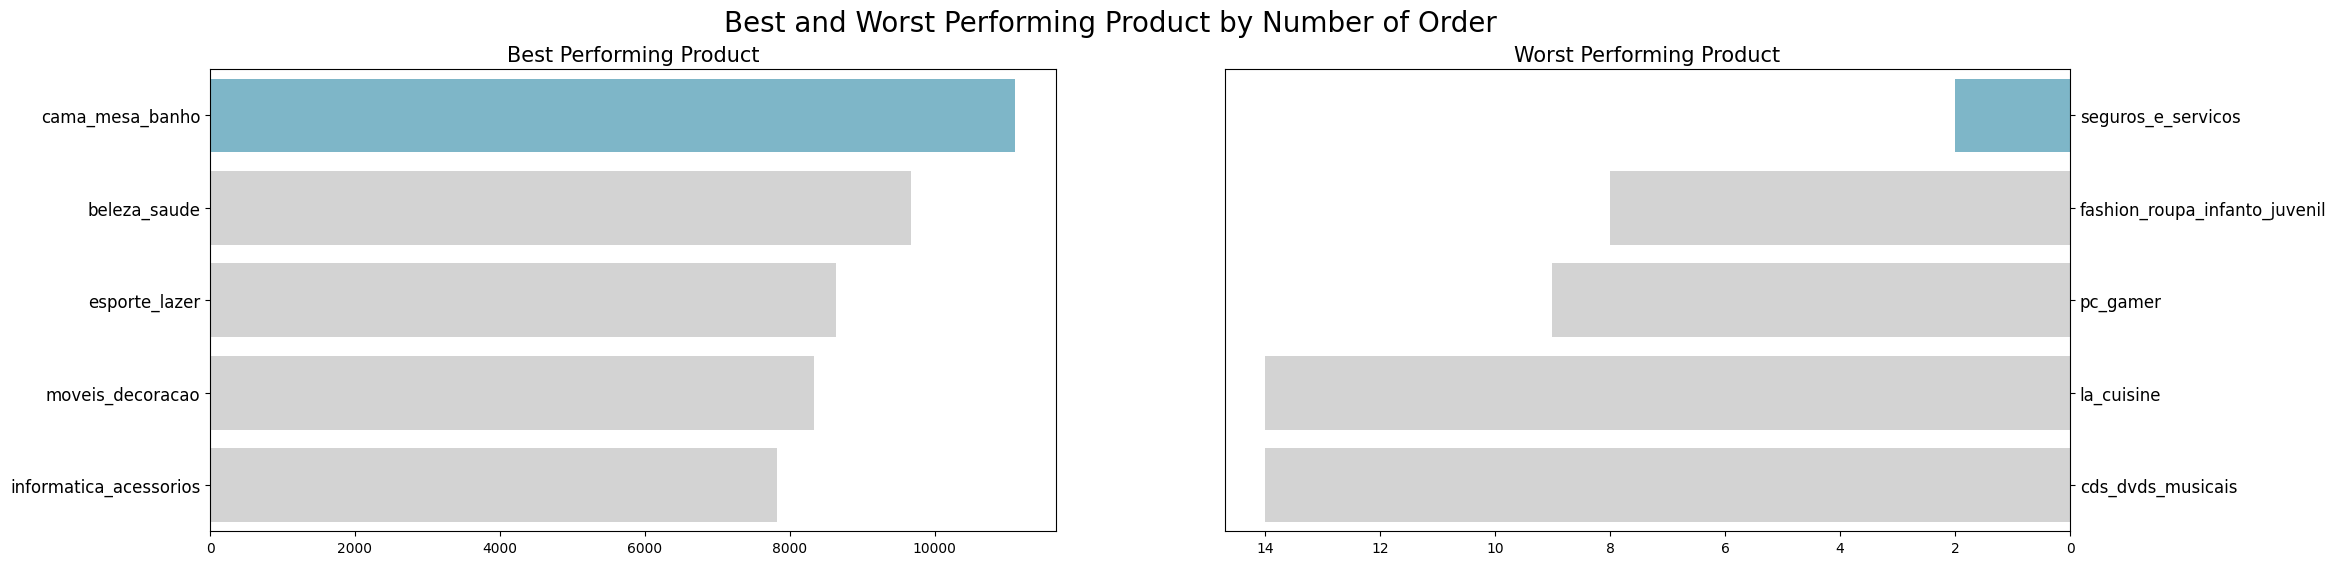

In [57]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="order_id", y="product_category_name", data=sum_order_items_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="order_id", y="product_category_name", data=sum_order_items_df.sort_values(by="order_id", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Best and Worst Performing Product by Number of Order", fontsize=20)
plt.show()

### Pertanyaan 2:

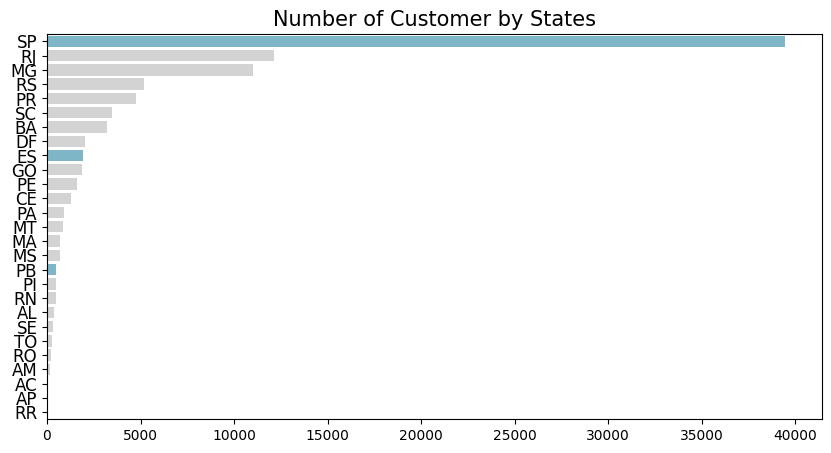

In [58]:
bystate_df = all_df.groupby(by="customer_state").customer_unique_id.nunique().reset_index()
bystate_df.rename(columns={
    "customer_unique_id": "customer_count"
}, inplace=True)
bystate_df
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="customer_count",
    y="customer_state",
    data=bystate_df.sort_values(by="customer_count", ascending=False),
    palette=colors_
)
plt.title("Number of Customer by States", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

### Pertanyaan 3, 4, 5: (RFM Analysis)

In [59]:
rfm_df = all_df.groupby(by="customer_unique_id", as_index=False).agg({
    "order_purchase_timestamp": "max", # mengambil tanggal order terakhir
    "order_id": "nunique", # menghitung jumlah order
    "total_price": "sum" # menghitung jumlah revenue yang dihasilkan
})
rfm_df.columns = ["customer_unique_id", "max_order_timestamp", "frequency", "monetary"]

# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = order["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_unique_id,frequency,monetary,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,160
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19,163
2,0000f46a3911fa3c0805444483337064,1,86.22,586
3,0000f6ccb0745a6a4b88665a16c9f078,1,43.62,370
4,0004aac84e0df4da2b147fca70cf8255,1,196.89,337


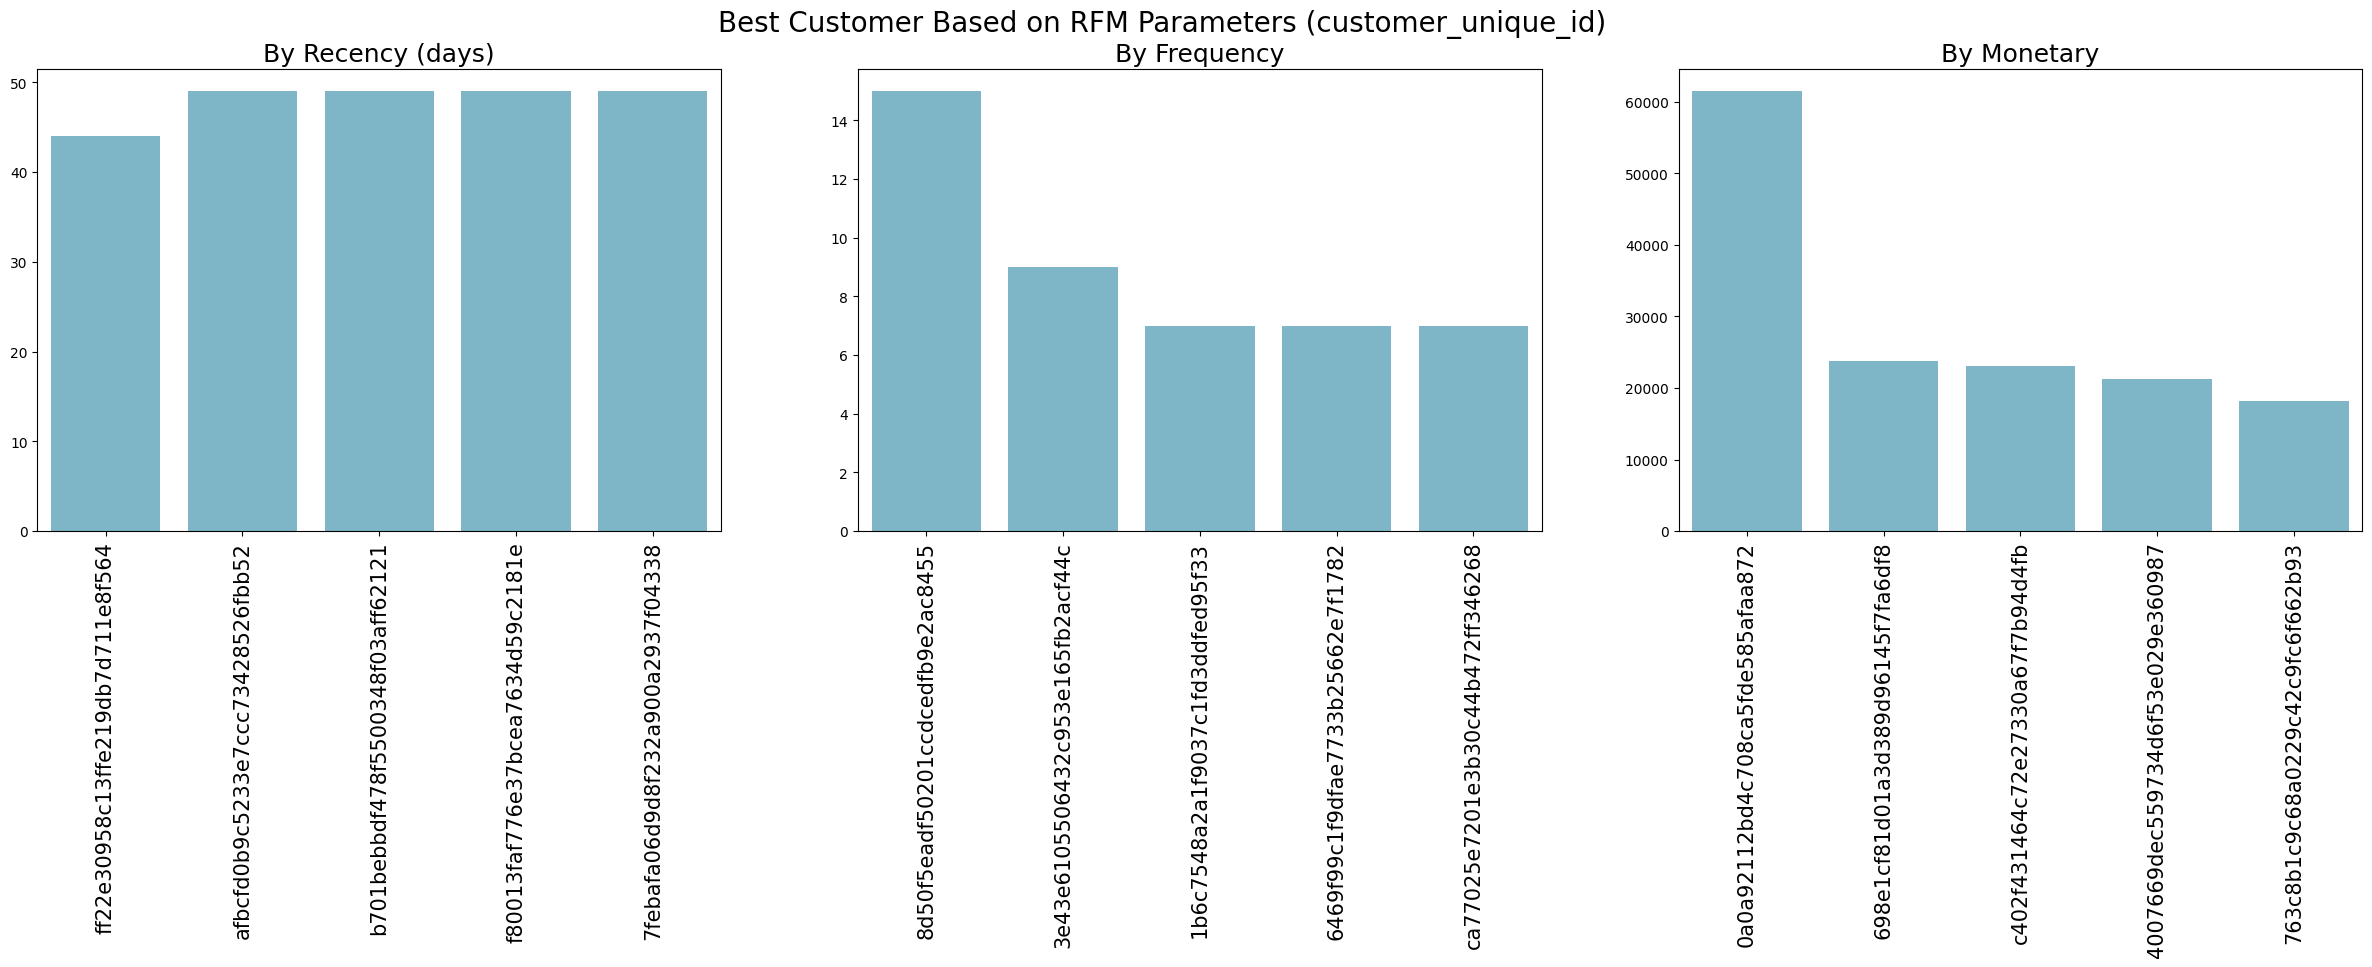

In [60]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="recency", x="customer_unique_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis='x', labelsize=15)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)  # Atur rotasi label sumbu x

sns.barplot(y="frequency", x="customer_unique_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)  # Atur rotasi label sumbu x

sns.barplot(y="monetary", x="customer_unique_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=90)  # Atur rotasi label sumbu x

plt.suptitle("Best Customer Based on RFM Parameters (customer_unique_id)", fontsize=20)
plt.show()

###  Analisis dan Penjelasan Hasil Output Dari Penerapan Metode RFM


- **Mayoritas pelanggan melakukan transaksi terakhir kurang dari 50 hari yang lalu** : Ini menunjukkan bahwa mayoritas pelanggan baru-baru ini melakukan pembelian. Hal ini mengindikasikan adanya aktivitas belanja yang relatif baru di antara sebagian besar pelanggan. Hal ini bisa dianggap sebagai hal yang positif karena menunjukkan keterlibatan dan interaksi yang terus-menerus dengan bisnis.
- **Pelanggan dengan ID 8d50f5eadf50201ccdcedfb9e2ac8455 adalah salah satu pelanggan yang sangat aktif** : Informasi ini menyoroti satu pelanggan khusus yang menonjol dalam hal frekuensi transaksi. Pelanggan ini telah melakukan 17 transaksi, menunjukkan tingkat aktivitas yang tinggi dan kesetiaan terhadap produk atau layanan yang Anda tawarkan.
- **Pendapatan terbesar berasal dari pelanggan dengan ID 0a0a92112bd4c708ca5fde585afaa872** : Fakta bahwa pendapatan terbesar berasal dari pelanggan tertentu menunjukkan bahwa pelanggan tersebut memiliki kontribusi yang signifikan terhadap total pendapatan bisnis. Ini menandakan pentingnya mempertahankan hubungan yang kuat dengan pelanggan ini dan mungkin juga mencari cara untuk meningkatkan nilai dari interaksi dengan pelanggan ini lebih lanjut.

## Conclusion

- Produk yang paling diminati atau laris terjual adalah "cama mesa banho" berdasarkan data penjualan yang diamati
- Melalui analisis, ditemukan bahwa negara bagian (state) SP atau São Paulo merupakan wilayah yang secara signifikan sering melakukan pembelian produk dari perusahaan kita.
- Mayoritas pelanggan melakukan transaksi terakhir kurang dari 50 hari yang lalu, menunjukkan adanya aktivitas belanja yang relatif baru.
- Dari data transaksi, diketahui bahwa pelanggan dengan ID 8d50f5eadf50201ccdcedfb9e2ac8455 merupakan salah satu pelanggan yang sangat aktif, dengan melakukan transaksi sebanyak 17 kali.
- Dalam hal pendapatan (revenue), terbesar tercatat berasal dari pelanggan dengan ID 0a0a92112bd4c708ca5fde585afaa872, menunjukkan kontribusi signifikan dari pelanggan tersebut dalam total pendapatan perusahaan.

In [61]:
all_df.to_csv("all_data.csv", index=False)